<a href="https://colab.research.google.com/github/cclljj/LJ-test/blob/master/6_1_Exploring_Machine__learning(Working).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.1 機器學習初探
之前的文章從概括了如何取用 ***民生公共物聯網*** 的資料、以及如何從時間上以及空間上來分析資料。而從本篇文章開始，我們將正式的走入應用的層面。<br>
本篇文章將會介紹兩個機器學習的經典問題，分別是 **分類問題 (Classification)** 以及 **分群問題 (Clustering)**。<br>



#Classification

分類是經典的機器學習問題，相信各位在高中的數學課，教統計的那段都有學過線性回歸吧!<br>
線性回歸的問題通常是這樣的：<br>
給你幾個點，要你把直線畫出來。其實就是要你合理的預測其他點會出現在什麼位置<br>
從這角度出發的話，分類問題與回歸問題其實十分相似，差別只在於要預測的結果 :
**回歸問題的結果是連續的，而分類問題則為離散的。**<br><br>

用比較數學的方式來定義分類問題的話，我們可以這樣描述 ：<br>
我們有一組已經分類好的數據 ***X*** 以及它對應的標籤(Label) ***Y***<br>
希望能夠藉由以上的資料來構成一個 ***分類器(Classifier)***，將另一組未分類的數據 ***X'*** 找到它對應的 ***Y'***<br>
用算式表達的話，就是：<br>
*Given* ***X*** *and it's label* ***Y*** *, we want to find a* ***Classifier C*** *such that* ***C(X') = Y'*** <br><br>

看到這邊，我想大家都發現了分類問題的重點其實就是要構造一個 ***Classifier***。<br>
為了達成這個目的，我們會設計一個模型，並且用現有的已標籤***(labeled)***數據去訓練它，試著讓模型適應***(fit)***這些數據的分布狀態。<br>
這個過程被稱為 ***監督式學習(Supervised learning)***。<br>
常見的模型有：[***Nearest Neighbors***](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), [***SVM Classifier***](https://en.wikipedia.org/wiki/Support-vector_machine), [***Decision Tree***](https://en.wikipedia.org/wiki/Decision_tree), [***Random Forest***](https://en.wikipedia.org/wiki/Random_forest), 等等。<br>
每個模型都有它各自的優勢跟劣勢，但這邊將不會針對細節進行講解，就把它們當作工具使用就好。<br><br>

看到這邊，相信各位對分類問題已經具有一定程度的理解了!<br>
那麼接著就讓我們試著實作看看吧！



## Air Data Classifiction (get data with pyCIOT)
這邊就讓我們用一個簡單的例子來說明吧~<br>
我們都知道空氣的狀態與環境是息息相關的，<br>
那麼我們是否能夠藉由目前空氣的狀態來得知目前的環境為何呢?<br><br>

**X : 溫度 相對溼度 PM2.5**<br>
**Y : 該區域之類型**

### Installing packages

In [ ]:
!pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ pyCIOT==0.2.3 --quiet
!pip3 install scikit-learn --quiet
!wget -q -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

     |████████████████████████████████| 62 kB 615 kB/s 


### Data overview and preprocessing

#### Get Air related data by using  **pyCIOT** 
為了能夠方便的獲取即時空氣資訊，這邊使用 ***民生公共物聯網*** 為python 開發的套件 ***pyCIOT***。<br>
這邊選用的是 ***OBSERVATION:EPA_IoT*** 也就是 ***智慧城鄉空品微型感測器*** 的數據

In [ ]:
from pyCIOT.data import *
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale=0.8)
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

SourceList = Air().get_source()
Source = SourceList[1]
print(SourceList)
print("Selected Source : {}".format(Source))

['OBSERVATION:EPA', 'OBSERVATION:EPA_IoT', 'OBSERVATION:AS_IoT', 'OBSERVATION:MOST_IoT', 'OBSERVATION:NCNU_IoT']
Selected Source : OBSERVATION:EPA_IoT


這邊我們透過 ***pyCIOT*** 來取得我們需要的資料<br>
需要稍待資料下載 (大約5~10分鐘)

In [ ]:
Data = Air().get_data(src=Source)
Data = [datapoint for datapoint in Data if len(datapoint['data']) == 3 and 'areaType' in datapoint['properties'].keys()]
print(json.dumps(Data[0], indent=4, ensure_ascii=False))

100%|██████████| 8906/8906 [07:27<00:00, 19.90it/s]

{
    "name": "智慧城鄉空品微型感測器-10287974676",
    "description": "智慧城鄉空品微型感測器-10287974676",
    "properties": {
        "city": "新北市",
        "areaType": "社區",
        "isMobile": "false",
        "township": "鶯歌區",
        "authority": "行政院環境保護署",
        "isDisplay": "true",
        "isOutdoor": "true",
        "stationID": "10287974676",
        "locationId": "TW040203A0507221",
        "Description": "廣域SAQ-210",
        "areaDescription": "鶯歌區"
    },
    "data": [
        {
            "name": "Relative humidity",
            "description": "相對溼度",
            "timestamp": "2022-08-05T06:51:29.000Z",
            "value": 70.77
        },
        {
            "name": "Temperature",
            "description": "溫度",
            "timestamp": "2022-08-05T06:51:29.000Z",
            "value": 33.78
        },
        {
            "name": "PM2.5",
            "description": "細懸浮微粒 PM2.5",
            "timestamp": "2022-08-05T06:51:29.000Z",
            "value": 9.09
        }
    ],
    "l

In [ ]:
Label = list(dict.fromkeys([datapoint['properties']['areaType'] for datapoint in Data if datapoint['properties']['areaType']]))
count = dict.fromkeys(Label, 0)
for datapoint in Data:
    count[datapoint['properties']['areaType']] += 1
print("Before data cleaning, There are {} records.".format(len(Data)))
print(json.dumps(count, indent=4, ensure_ascii=False))

Before data cleaning, There are 8620 records.
{
    "社區": 223,
    "交通": 190,
    "一般社區": 2021,
    "工業": 12,
    "測站比對": 66,
    "工業區": 3333,
    "交通區": 683,
    "鄰近工業區社區": 948,
    "輔助區": 165,
    "特殊區(民眾陳情熱區)": 143,
    "特殊區(敏感族群聚集區)": 200,
    "特殊區(測站比對)": 32,
    "輔助區(無測站區)": 4,
    "工業感測": 196,
    "特殊感測": 4,
    "輔助感測": 295,
    "交通感測": 102,
    "機動感測": 2,
    "社區感測": 1
}


#### Data cleaning
從上面的輸出結果可以觀察到，原始數據的部分分類本質上是相同的，只是名稱有所不同，例如"交通" 跟 交通區。<br>
為了避免讓模型學習到不良的資訊，我們要適度的對數據進行整併。

In [ ]:
for datapoint in Data:
    if datapoint['properties']['areaType'] == '社區':
        datapoint['properties']['areaType'] = '一般社區'
    elif datapoint['properties']['areaType'] == '社區感測':
        datapoint['properties']['areaType'] = '一般社區'
    elif datapoint['properties']['areaType'] == '交通':
        datapoint['properties']['areaType'] = '交通區'
    elif datapoint['properties']['areaType'] == '交通感測':
        datapoint['properties']['areaType'] = '交通區'
    elif datapoint['properties']['areaType'] == '工業':
        datapoint['properties']['areaType'] = '工業區'
    elif datapoint['properties']['areaType'] == '工業感測':
        datapoint['properties']['areaType'] = '工業區'
    if not datapoint['properties']['areaType'] in ['一般社區', '交通區', '工業區', '鄰近工業區社區']:
        datapoint['properties']['areaType'] = None
Data = [datapoint for datapoint in Data if datapoint['properties']['areaType'] != None]
Label = ['一般社區', '交通區', '工業區', '鄰近工業區社區']
count = dict.fromkeys(Label, 0)
for datapoint in Data:
    count[datapoint['properties']['areaType']] += 1
print("After data cleaning, There are {} records.".format(len(Data)))
print(json.dumps(count, indent=4, ensure_ascii=False))

After data cleaning, There are 7709 records.
{
    "一般社區": 2245,
    "交通區": 975,
    "工業區": 3541,
    "鄰近工業區社區": 948
}


對標籤整理完後，我們就可以來觀察一下數據的分布狀態了。<br>
由於我們選用的數據僅有三維，因此我們可以繪圖觀察。<br>
可以看到大部分的數據都聚集在一個區塊，但是還是有零散的點分布在很外圍的地方，<br>
看起來就像是脫離了數據的主要分布狀態，這種數據點我們稱為***離群值(Outlier)***。<br>
這種特殊的點通常會導致我們的模型走向極端化，因而失去其通用性。<br>
有鑑於此，在開始訓練之前，通常會想辦法將這些特殊的數據點移除。

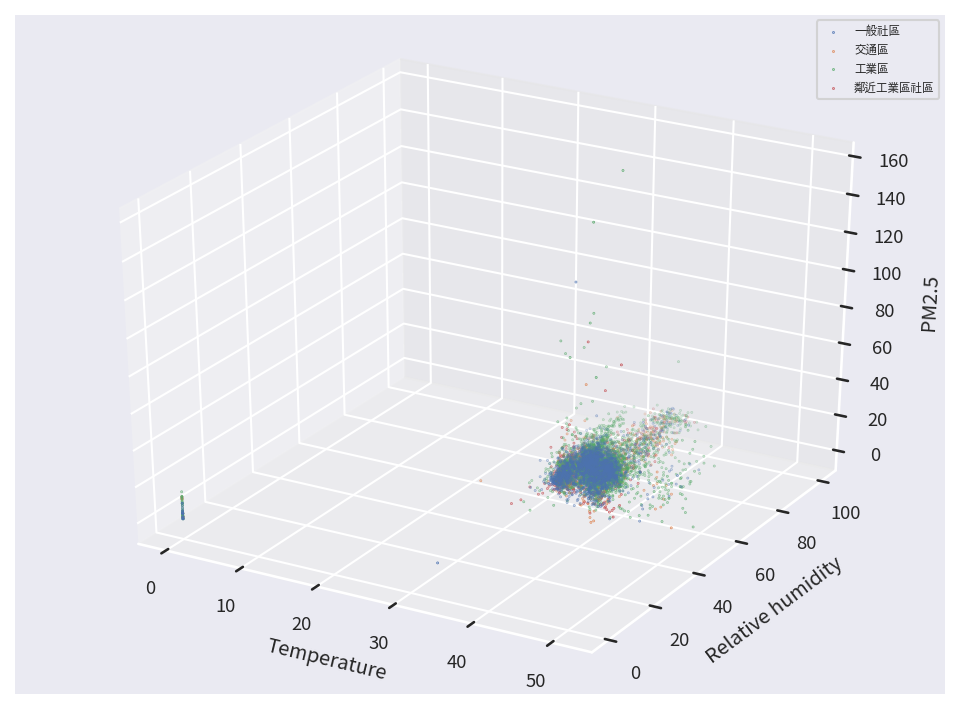

In [ ]:
DataX, DataY = [], []
for datapoint in Data:
    TmpX = [None]*3
    TmpY = None
    for rawdata_array in datapoint['data']:
        if(rawdata_array['name'] == 'Temperature'):
            TmpX[0] = rawdata_array['value']
        if(rawdata_array['name'] == 'Relative humidity'):
            TmpX[1] = rawdata_array['value']
        if(rawdata_array['name'] == 'PM2.5'):
            TmpX[2] = rawdata_array['value']
    TmpY = Label.index(datapoint['properties']['areaType'])
    DataX.append(TmpX)
    DataY.append(TmpY)

DataX_Numpy = np.array(DataX)
DataY_Numpy = np.array(DataY)
plt.rc('legend',fontsize="xx-small")
fig = plt.figure(figsize=(8, 6), dpi=150)
ax = fig.add_subplot(projection='3d')
for i in range(len(Label)):
    ax.scatter(DataX_Numpy[DataY_Numpy==i][:,0],DataX_Numpy[DataY_Numpy==i][:,1],DataX_Numpy[DataY_Numpy==i][:,2], s=0.1, label=Label[i])
ax.legend()
ax.set_xlabel('Temperature')
ax.set_ylabel('Relative humidity')
ax.set_zlabel('PM2.5')
plt.show()

#### Remove outliers
移除離群值實際上也有許多的方式，但這邊就讓我們選用一個簡單的方式 : <br>
**移除掉所有在兩個標準差以外的數據**<br>
在移除掉離群值後，我們可以觀察到大多數的數據點都落在了合理的範圍內。


After removing Outliers, there are 7161 data left.


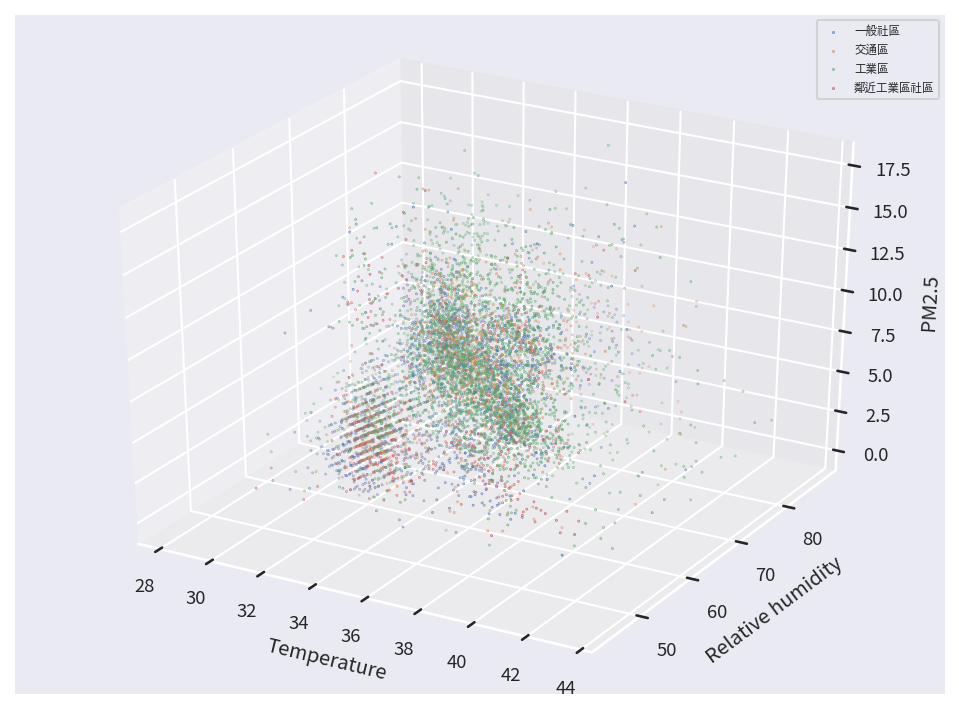

In [ ]:
def Outlier_Filter(arr, k):
    # STD = [np.std(arr[:,i]) for i in range(arr.shape[1])]
    # Mean = [np.mean(arr[:,i]) for i in range(arr.shape[1])]
    Boolean_Arr =  np.ones(arr.shape[0], dtype=bool)
    for i in range(arr.shape[1]):
        Boolean_Arr = Boolean_Arr & (abs(arr[:,i] - np.mean(arr[:,i])) <  k*np.std(arr[:,i]))
    return Boolean_Arr
# STD_Temperature = np.std(DataX_Numpy[:,0])
# STD_RelativeHumidity = np.std(DataX_Numpy[:,1])
# STD_PM25 = np.std(DataX_Numpy[:,2])

# Mean_Temperature = np.mean(DataX_Numpy[:,0])
# Mean_RelativeHumidity = np.mean(DataX_Numpy[:,1])
# Mean_PM25 = np.mean(DataX_Numpy[:,2])

OutlierFilter = Outlier_Filter(DataX_Numpy, 2)
DataX_Numpy = DataX_Numpy[OutlierFilter]
DataY_Numpy = DataY_Numpy[OutlierFilter]
print("After removing Outliers, there are {} data left.".format(DataX_Numpy.shape[0]))
plt.rc('legend',fontsize="xx-small")
fig = plt.figure(figsize=(8, 6), dpi=150)
ax = fig.add_subplot(projection='3d')
for i in range(len(Label)):
    ax.scatter(DataX_Numpy[DataY_Numpy==i][:,0],DataX_Numpy[DataY_Numpy==i][:,1],DataX_Numpy[DataY_Numpy==i][:,2], s=0.1, label=Label[i])
ax.legend()
ax.set_xlabel('Temperature')
ax.set_ylabel('Relative humidity')
ax.set_zlabel('PM2.5')
plt.show()

有時候同時觀察多維數據可能難以看出端倪，此時可以選擇少數維度出來單獨觀察。<br>
這邊我們可以試著把三個維度拆成三個二維圖來觀察。<br>
從這三張圖，已經可以看出有一些特徵存在，但對於人類仍難以辨別，此時就可以準備交給機器處理了。

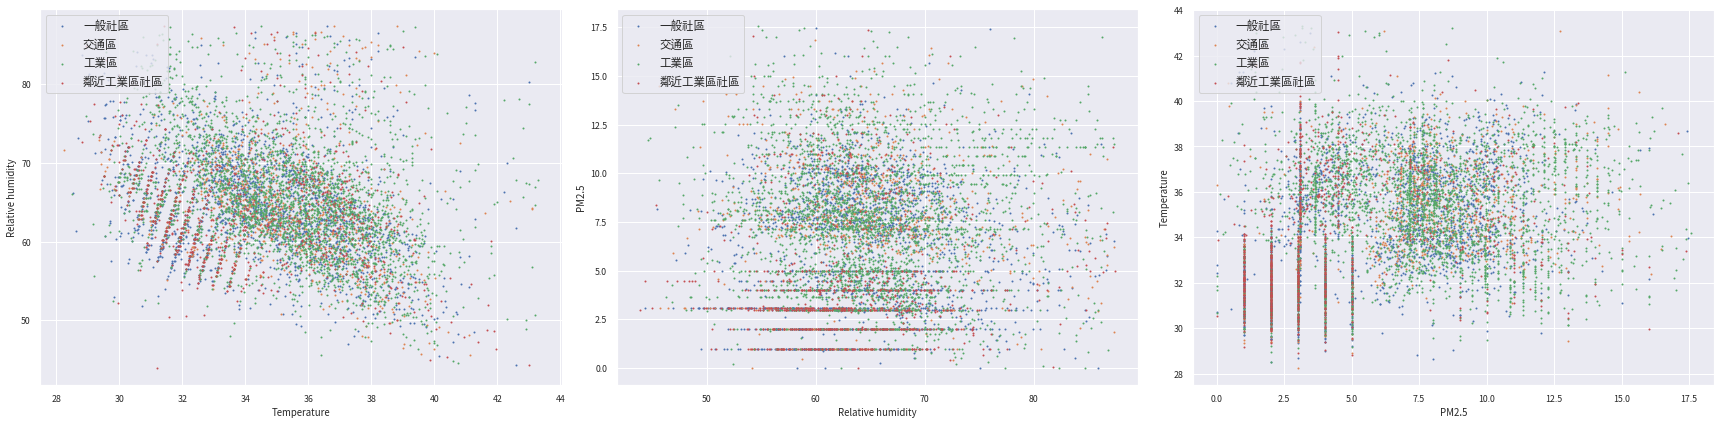

In [ ]:
plt.rc('legend',fontsize="large")
fig, axes = plt.subplots(1,3,figsize=(24, 6))
for i in range(DataX_Numpy.shape[1]):
    for j in range(len(Label)):
        axes[i].scatter(DataX_Numpy[DataY_Numpy==j][:,i%3],DataX_Numpy[DataY_Numpy==j][:,(i+1)%3], s=1, label=Label[j])
        axes[i].legend(loc=2)
        Axis_label = ['Temperature', 'Relative humidity', 'PM2.5']
        axes[i].set_xlabel(Axis_label[i%3])
        axes[i].set_ylabel(Axis_label[(i+1)%3])
plt.tight_layout()

#### Spliting the data into **Train and Test datasets** for the following section
在交給機器之前，我們還有最後一步要做，就是拆分數據集。<br>
就像人類要考試才知道自己學得好不好，機器也是需要被測驗的。<br>
因此我們要把現有的數據拆成兩份，一份是訓練用的(Train)，另一份則是測試用的(Test)。<br>
至此，我們就做完了所有前置作業。

In [ ]:
indices = np.random.permutation(DataX_Numpy.shape[0])
Train_idx, Test_idx = indices[:int(DataX_Numpy.shape[0]*0.8)], indices[80:(DataX_Numpy.shape[0] - int(DataX_Numpy.shape[0]*0.8))]
TrainX, TestX = DataX_Numpy[Train_idx,:], DataX_Numpy[Test_idx,:]
TrainY, TestY = DataY_Numpy[Train_idx], DataY_Numpy[Test_idx]
print("Size of training dataset : {} \nSize of training dataset : {}".format(TrainX.shape[0], TestX.shape[0]))

Size of training dataset : 5728 
Size of training dataset : 1353


### Classification by using Scikit learn
原先，建立模型是一件相當困難且繁瑣的過程，但如今我們可以選擇利用現成的套件來省略這個過程。<br>
這裡我們選用的是 ***Scikit learn(sklearn)***。 <br>
sklearn 內含許多現成的分類器模型讓我們選用，這邊就讓我們拿幾個出來試試看吧!<br><br>

從測試的結果可以看到，表現最好的分類器，分類的正確率高達7成，並且在數量較少的分類也能成功的判別出來。<br>
至此，我們就做好了一個可以藉由空氣狀態判別環境類別的分類器!!

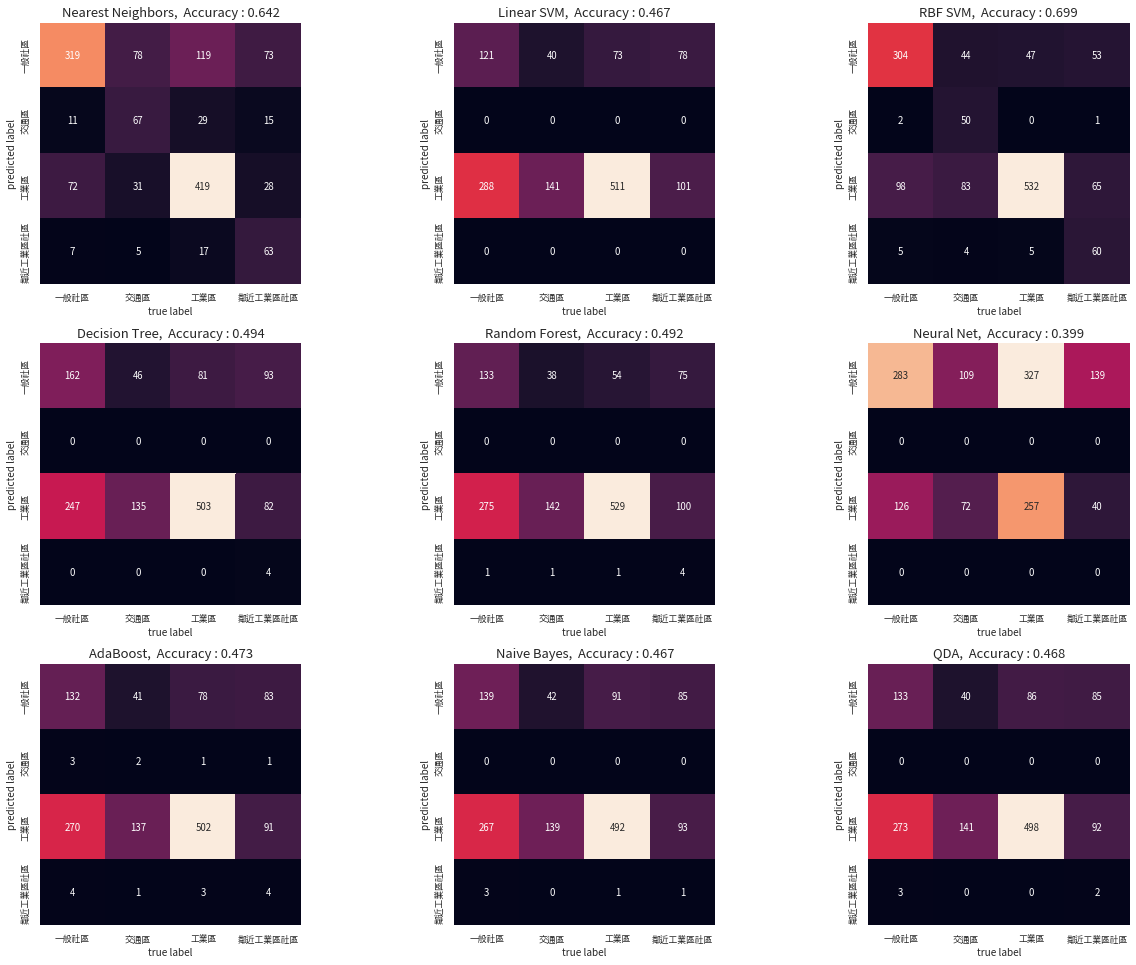

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

fig, axes = plt.subplots(3,3,figsize=(18, 13.5))
for i, model in enumerate(classifiers):
    model.fit(TrainX, TrainY)
    Result = model.predict(TestX)
    # print("Accuracy for {} : {}".format(names[i], accuracy_score(Result, TestY)))
    mat = confusion_matrix(TestY, Result)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=Label, yticklabels=Label, ax = axes[i//3][i%3])
    axes[i//3][i%3].set_title("{},  Accuracy : {}".format(names[i], round(accuracy_score(Result, TestY), 3)), fontweight="bold", size=13)
    axes[i//3][i%3].set_xlabel('true label', fontsize = 10.0)
    axes[i//3][i%3].set_ylabel('predicted label', fontsize = 10.0)
plt.tight_layout()

# Clustering
分群問題，從數學的角度上可以說與前面提到的分類問題是相當相似的。<br>
兩者的差異主要在於：<br>
分類問題通常會用***已知(labeled data)推論未知(unlabeled data)<br>***
分群問題則是完全的***無中生有***<br>
這樣聽起來好像還是很難理解，沒關係讓我們用數學的角度來認識一下分群問題吧~<br><br>

用數學的方式定義分群問題的話，我們可以這樣描述：<br>
我們有一組完全沒有標記的數據 ***X*** ，<br>
希望能夠藉由某種 ***演算法 F***，將這些沒有標記的數據 ***X*** 給予一個 **有意義的(meaningful)** 標籤 ***Y***<br>
也就是最終，我期望  ***F(X) = Y*** <br>
*Given* ***X*** *and a Function* ***F***, *we want to find the corrsponding label* ***y*** *for each* ***x*** <br><br>

由上面，我們可以知道，基本上分群要做的就是根據數據的特性，將相似的數據點打上相同的標籤。<br>
那這邊就會出現另外一個問題了，何謂相似呢?<br>
一個最簡單的想法就是數據點靠得越近，他們就越相似。也就是 **"近朱者赤，近墨者黑"** 。<br>
除此之外，當然還有許多不同的演算法。
這邊就簡單的舉幾個給大家參考：<br>
近朱者赤，近墨者黑 : [***K-Means***](https://en.wikipedia.org/wiki/K-means_clustering), [***DBSCAN***](https://en.wikipedia.org/wiki/DBSCAN) <br>
階層式分群(樹狀結構) : [***Agglomerative Clustering***](https://en.wikipedia.org/wiki/Hierarchical_clustering)，[***BIRCH***](https://en.wikipedia.org/wiki/BIRCH)<br><br>

在介紹完分群問題後，就讓我們實際的上手吧~






## Air Data Clustering
空氣汙染一直是近年來相當重要的議題。<br>
從課本上，我們學到空氣汙染的散播與天氣及地理特性息息相關。<br>
這邊就讓我們用分群演算法來分析看看是否確有其事吧~

### Installing packages

In [ ]:
!pip3 install fastdtw --quiet
!pip3 install scikit-learn --quiet
!wget -q -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

### Get data from https://history.colife.org.tw
為了取得有關空氣汙染的歷史資料，我們選擇從 ***民生公共物聯網*** 所提供的[歷史資料庫](https://history.colife.org.tw)中下載 **環保署_國家空品測站** 的數據。

In [ ]:
!wget -O 'EPA_OD_2021.zip' -q "https://history.colife.org.tw/?r=/download&path=L%2Bepuuawo%2BWTgeizqi%2FnkrDkv53nvbJf5ZyL5a6256m65ZOB5ris56uZL0VQQV9PRF8yMDIxLnppcA%3D%3D"
!unzip -q 'EPA_OD_2021.zip' && rm 'EPA_OD_2021.zip' 
!unzip -q '/content/EPA_OD_2021/EPA_OD_202112.zip' -d '/content'
!rm -rf '/content/EPA_OD_2021'

### Data overview and preprocessing
這邊選用去年12月的資料<br>
讀進來後，先把跟分析無關的欄刪除掉，並且將數值資料的資料型態轉為浮點數，以利後續的處理。

In [ ]:
import warnings
warnings.simplefilter(action='ignore')
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import numpy as np
import pandas as pd
import math
from scipy.spatial.distance import euclidean
import geopy.distance
from fastdtw import fastdtw

Dataframe = pd.read_csv("/content/EPA_OD_202112.csv", parse_dates=['PublishTime'])
Dataframe = Dataframe.drop(columns=["Pollutant", "SiteId", "Status", "SO2_AVG"])
Numerical_ColumnNames = list(Dataframe.columns.values)
for ColumnName in ['SiteName', 'County', 'PublishTime']:
    Numerical_ColumnNames.remove(ColumnName)
for Numerical_ColumnName in Numerical_ColumnNames:
    Dataframe[Numerical_ColumnName] = pd.to_numeric(Dataframe[Numerical_ColumnName], errors='coerce').astype('float64')
Dataframe = Dataframe.dropna()
# Dataframe.info()
Dataframe.head()

,SiteName,County,AQI,SO2,CO,CO_8hr,O3,O3_8hr,PM10,PM10_AVG,PM2.5,PM2.5_AVG,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,Longitude,Latitude
0,前金,高雄市,64.0,0.7,0.32,0.2,36.5,34.0,46.0,52.0,27.0,20.0,9.6,10.2,0.6,3.4,7.0,2021-12-01,120.288086,22.632567
1,左營,高雄市,61.0,0.6,0.36,0.2,36.6,36.0,46.0,51.0,26.0,19.0,9.8,10.0,0.1,4.4,9.0,2021-12-01,120.292917,22.674861
2,林園,高雄市,66.0,3.7,0.44,0.3,24.8,31.0,56.0,59.0,24.0,21.0,20.3,21.5,1.2,4.2,343.0,2021-12-01,120.411750,22.479500
3,大寮,高雄市,54.0,0.8,0.28,0.2,26.8,28.0,42.0,47.0,19.0,16.0,16.9,17.7,0.8,1.9,328.0,2021-12-01,120.425311,22.564136
4,鳳山,高雄市,74.0,2.3,0.47,0.5,24.8,24.0,46.0,53.0,28.0,24.0,18.0,19.3,1.3,0.9,240.0,2021-12-01,120.358083,22.627392


接著為了避免運算量過大，這邊只擷取一段時間的數據。<br>

In [ ]:
OneDay_Dataframe = Dataframe.loc[(Dataframe['PublishTime'] <= '2021-12-17 23:00:00') & (Dataframe['PublishTime'] >= '2021-12-13 00:00:00')]
OneDay_Dataframe['CountyAndSiteName'] = OneDay_Dataframe['County'] + OneDay_Dataframe['SiteName']
OneDay_Dataframe = OneDay_Dataframe.drop(columns=["County", "SiteName"])
OneDay_Dataframe = OneDay_Dataframe.sort_values(by=['CountyAndSiteName','PublishTime'])
OneDay_Dataframe = OneDay_Dataframe.set_index(keys = ['CountyAndSiteName'])
# OneDay_Dataframe.info()
OneDay_Dataframe

,AQI,SO2,CO,CO_8hr,O3,O3_8hr,PM10,PM10_AVG,PM2.5,PM2.5_AVG,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,Longitude,Latitude
CountyAndSiteName,,,,,,,,,,,,,,,,,,
南投縣南投,35.0,1.6,0.30,0.3,4.4,17.0,19.0,25.0,9.0,10.0,11.1,12.3,1.2,0.3,6.0,2021-12-13 02:00:00,120.685306,23.913000
南投縣南投,35.0,1.6,0.30,0.3,4.4,17.0,19.0,25.0,9.0,10.0,11.1,12.3,1.2,0.3,6.0,2021-12-13 02:00:00,120.685306,23.913000
南投縣南投,35.0,1.6,0.30,0.3,4.4,17.0,19.0,25.0,9.0,10.0,11.1,12.3,1.2,0.3,6.0,2021-12-13 02:00:00,120.685306,23.913000
南投縣南投,35.0,1.6,0.28,0.3,5.0,14.0,19.0,23.0,11.0,10.0,9.4,10.5,1.1,0.7,63.0,2021-12-13 03:00:00,120.685306,23.913000
南投縣南投,35.0,1.6,0.28,0.3,5.0,14.0,19.0,23.0,11.0,10.0,9.4,10.5,1.1,0.7,63.0,2021-12-13 03:00:00,120.685306,23.913000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
高雄市鳳山,123.0,2.1,0.94,0.9,16.0,38.0,78.0,119.0,42.0,44.0,25.7,31.6,5.9,1.7,265.0,2021-12-17 22:00:00,120.358083,22.627392
高雄市鳳山,123.0,2.1,0.94,0.9,16.0,38.0,78.0,119.0,42.0,44.0,25.7,31.6,5.9,1.7,265.0,2021-12-17 22:00:00,120.358083,22.627392
高雄市鳳山,123.0,2.2,0.83,0.9,21.9,28.0,80.0,106.0,42.0,43.0,22.1,26.0,3.8,1.4,243.0,2021-12-17 23:00:00,120.358083,22.627392


到這邊，我們有許多不同測站的空氣汙染物質時間序列。<br>
藉由 ***DTW(Dynamic Time Warping)*** ，我們可以計算測站兩兩之間空氣汙染物質時間序列的DTW距離。<br>
若兩個時間序列的DTW距離越短，兩者的相似性就越高。<br>

In [ ]:
Site_TimeSeriesData = dict()
for Site in np.unique(OneDay_Dataframe.index.values):
    tmp = OneDay_Dataframe[OneDay_Dataframe.index == Site]
    tmp = tmp.groupby(['CountyAndSiteName', 'PublishTime'], as_index=False).mean()
    tmp = tmp.loc[:,~tmp.columns.isin(['CountyAndSiteName', 'PublishTime'])]
    Site_TimeSeriesData[Site] = tmp.to_numpy()

DictKeys = Site_TimeSeriesData.keys()
Sites_DTW = dict()
for i, key1 in enumerate(DictKeys):
    for j, key2 in enumerate(DictKeys):
        if i >= j: 
            continue
        else:
            Sites_DTW[str(key1)+" "+str(key2)] = fastdtw(Site_TimeSeriesData[key1][:,:-4], Site_TimeSeriesData[key2][:,:-4], dist=euclidean)[0]
Sites_DTW_keys = np.array(list(Sites_DTW.keys()))
Site_DTW_Numpy = np.array([[value] for _, value in Sites_DTW.items()])

這邊我們將所有測站之間的DTW距離畫在數線上，看起來就像下面這樣。<br>
距離從大到小都有，這邊我們利用分群演算法來協助我們做分析。

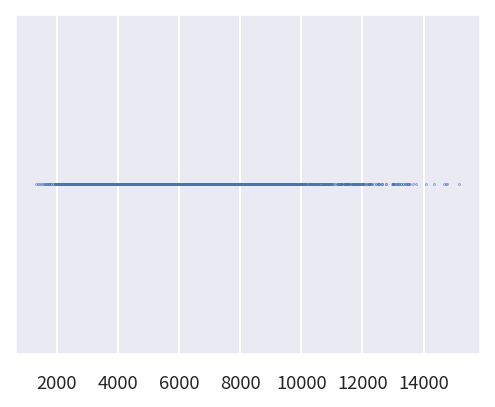

In [ ]:
fig = plt.figure(figsize=(4, 3), dpi=150)
ax = fig.add_subplot(1,1,1)
ax.scatter(Site_DTW_Numpy[:,0], [1]*len(Sites_DTW.items()), s=0.05)
ax.get_yaxis().set_visible(False)

### Clurstering and Explore result
這邊我們採用 ***K-Mean*** 演算法來進行分群，並且將群數設為三群。<br>
從下面的圖，我們可以看到數據被分成了三群，接著我們要來探討看看三群是否有其特殊的意義。

Number of Cluster0 : 1165
Number of Cluster1 : 994
Number of Cluster2 : 542


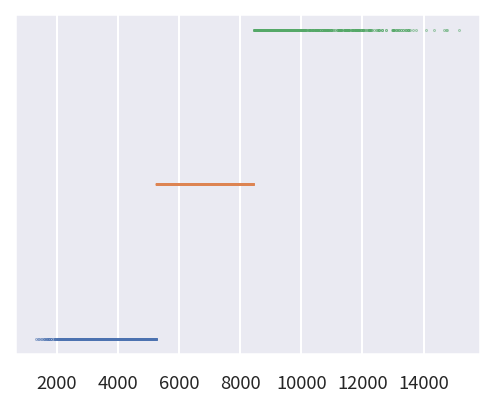

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=0).fit([[value] for _, value in Sites_DTW.items()])
Result = model.labels_
for i in np.unique(Result):
    print("Number of Cluster{} : {}".format(i,len(Result[Result==i])))
fig = plt.figure(figsize=(4, 3), dpi=150)
ax = fig.add_subplot(1,1,1)
for i in np.unique(Result):
    ax.scatter(Site_DTW_Numpy[Result==i][:,0],[i]*len(Site_DTW_Numpy[Result==i]), s=0.05)
ax.get_yaxis().set_visible(False)

#### Relationship between Clustering result and Distance
首先，我們先來討論看看分群結果是否與測站間距離相關。<br>
從結果可以看到，<br>
DTW距離較低(時間序列相似度高)的群體其測站間距離的平均較低。<br>
而DTW距離較高(時間序列相似度低)的群體其測站間距離的平均較高。<br>
這個結果應證了汙染物的擴散確實會受到距離的影響。

Mean Distance between Sites for Cluster0 : 84.34126465234523
In Cluster0 there are 60.09% less than mean, and 39.91% greater than mean.

Mean Distance between Sites for Cluster1 : 180.26230465399215
In Cluster1 there are 54.53% less than mean, and 45.47% greater than mean.

Mean Distance between Sites for Cluster2 : 234.89206124762546
In Cluster2 there are 39.48% less than mean, and 60.52% greater than mean.



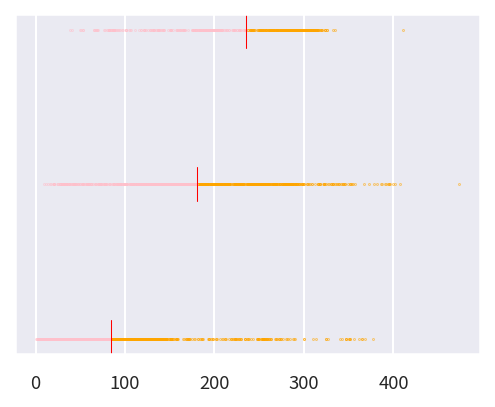

In [ ]:
Dist_for_Clusters = [None]*len(np.unique(Result))
for i in np.unique(Result):
    Dist_for_Cluster = []
    Cluster = Sites_DTW_keys[Result==i]
    for Sites in Cluster:
        Site1, Site2 = Sites.split(' ')
        coord1 = Site_TimeSeriesData[Site1][0,-1], Site_TimeSeriesData[Site1][0,-2]
        coord2 = Site_TimeSeriesData[Site2][0,-1], Site_TimeSeriesData[Site2][0,-2]
        Dist_for_Cluster.append(geopy.distance.geodesic(coord1, coord2).km)
    Dist_for_Cluster = np.array(Dist_for_Cluster)
    Dist_for_Clusters[i] = Dist_for_Cluster
Dist_for_Clusters = np.array(Dist_for_Clusters)
# for Dist_for_Cluster in Dist_for_Clusters:
#     print(np.mean(Dist_for_Cluster))

fig = plt.figure(figsize=(4, 3), dpi=150)
ax = fig.add_subplot(1,1,1)
for i in np.unique(Result):
    gtMean = Dist_for_Clusters[i][Dist_for_Clusters[i]>np.mean(Dist_for_Clusters[i])]
    ltMean = Dist_for_Clusters[i][Dist_for_Clusters[i]<np.mean(Dist_for_Clusters[i])]
    print("Mean Distance between Sites for Cluster{} : {}".format(i, np.mean(Dist_for_Clusters[i])))
    print("In Cluster{} there are {:.2%} less than mean, and {:.2%} greater than mean.\n".format(i, len(ltMean)/len(Dist_for_Clusters[i]), len(gtMean)/len(Dist_for_Clusters[i])))
    ax.scatter(gtMean, [i]*len(gtMean), s=0.05, color="orange")
    ax.scatter(ltMean, [i]*len(ltMean), s=0.05, color="pink")
    ax.axvline(np.mean(Dist_for_Clusters[i]), ymin = 0.45*i, ymax = 0.45*i+0.1, color = "red", linewidth=0.5)
ax.get_yaxis().set_visible(False)

#### Relationship between Clustering result, Bearing, and Wind Direction 
除了距離以外，風向也是一個空氣汙染擴散的重要因素。<br>
從結果我們也可以看到確實如此，<br>
DTW距離較低的群體，其風向與測站間方位角相似的比例高達54%<br>
而DTW距離較高的群體，其風向與測站間方位角相似的比例僅有22%<br>
這個結果證實了空氣汙染擴散與風向的相關性。

Relevance for Cluster0 : 54.08%
Relevance for Cluster1 : 39.24%
Relevance for Cluster2 : 22.69%


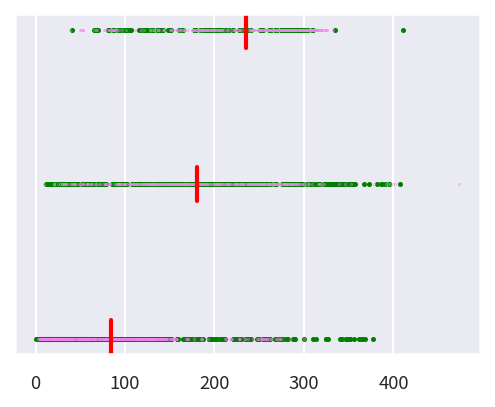

In [ ]:
def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = np.arctan2(x,y)
    brng = np.degrees(brng)
    return brng

def Check_Wind_Dirc(brng, wind_dirc):
    if brng > 180:
        return ((brng < wind_dirc + 45) and (brng > wind_dirc - 45)) or ((brng - 180 < wind_dirc + 45) and (brng - 180 > wind_dirc - 45))
    else:
        return ((brng < wind_dirc + 45) and (brng > wind_dirc - 45)) or ((brng + 180 < wind_dirc + 45) and (brng + 180 > wind_dirc - 45))

Brng_for_Clusters = [None]*len(np.unique(Result))
Boolean_WindRelated_for_Clusters = [None]*len(np.unique(Result))
for i in np.unique(Result):
    Brng_for_Cluster = []
    Boolean_WindRelated_for_Cluster = []
    Cluster = Sites_DTW_keys[Result==i]
    for Sites in Cluster:
        Site1, Site2 = Sites.split(' ')
        coord1 = Site_TimeSeriesData[Site1][0,-1], Site_TimeSeriesData[Site1][0,-2]
        coord2 = Site_TimeSeriesData[Site2][0,-1], Site_TimeSeriesData[Site2][0,-2]
        Brng_Between_Site = get_bearing(coord1[0], coord1[1], coord2[0], coord2[1])
        Brng_for_Cluster.append(Brng_Between_Site)
        MeanWindDirc1 = np.mean(Site_TimeSeriesData[Site1][:,-3])
        MeanWindDirc2 = np.mean(Site_TimeSeriesData[Site2][:,-3])
        Boolean_WindRelated_for_Cluster.append(Check_Wind_Dirc(Brng_Between_Site, MeanWindDirc1) or Check_Wind_Dirc(Brng_Between_Site, MeanWindDirc2))
    Brng_for_Cluster = np.array(Brng_for_Cluster)
    Boolean_WindRelated_for_Cluster = np.array(Boolean_WindRelated_for_Cluster)
    Boolean_WindRelated_for_Clusters[i] = Boolean_WindRelated_for_Cluster
    Brng_for_Clusters[i] = Brng_for_Cluster
Brng_for_Clusters = np.array(Brng_for_Clusters)
Boolean_WindRelated_for_Clusters = np.array(Boolean_WindRelated_for_Clusters)


fig = plt.figure(figsize=(4, 3), dpi=150)
ax = fig.add_subplot(1,1,1)
for i in np.unique(Result):
    print("Relevance for Cluster{} : {:.2%}".format(i, len(Dist_for_Clusters[i][Boolean_WindRelated_for_Clusters[i] == True])/len(Dist_for_Clusters[i])))
    ax.scatter(Dist_for_Clusters[i][Boolean_WindRelated_for_Clusters[i] == True],\
               [i]*len(Dist_for_Clusters[i][Boolean_WindRelated_for_Clusters[i] == True]), s=2, color="green")
    ax.scatter(Dist_for_Clusters[i][Boolean_WindRelated_for_Clusters[i] == False],\
               [i]*len(Dist_for_Clusters[i][Boolean_WindRelated_for_Clusters[i] == False]), s=0.05, color="violet")
    ax.axvline(np.mean(Dist_for_Clusters[i]), ymin = 0.45*i, ymax = 0.45*i+0.1, color = "red", linewidth=2)
ax.get_yaxis().set_visible(False)


# Let's put clustering and classifiction together!!

在學習完上面兩種問題後，讓我們試著將他們結合在一起解決問題吧！<br>
在台灣，我們經常面對各種不同的災害，其中淹水更是幾乎每年都會發生的常見災害。<br>
要是我們能夠提前得知淹水的到來，就有可能減少許多可以避免的災損。<br>
現在就讓我們結合 ***民生公共物聯網*** 所提供的 災害示警與災情通報資料 以及 氣象資料，<br>
來試著實作淹水的預測系統吧！

## Get data from https://history.colife.org.tw

In [ ]:
!wget -q -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!wget -O 'Rain_2021.zip' -q "https://history.colife.org.tw/?r=/download&path=L%2Bawo%2BixoS%2FkuK3lpK7msKPosaHlsYBf6Zuo6YeP56uZLzIwMjEuemlw"
!wget -O 'Rain_Stataion.csv' -q "https://history.colife.org.tw/?r=/download&path=L%2Bawo%2BixoS%2FkuK3lpK7msKPosaHlsYBf6Zuo6YeP56uZL3JhaW5fc3RhdGlvbi5jc3Y%3D"
!unzip -q 'Rain_2021.zip' && rm 'Rain_2021.zip' 
!find '/content/2021' -name '*.zip'  -exec unzip -q {} -d '/content/Rain_2021_csv' \;
!rm -rf '/content/2021'

!wget -O 'Flood_2021.zip' -q "https://history.colife.org.tw/?r=/download&path=L%2BawtOizh%2Ba6kC%2FmsLTliKnnvbLvvIjoiIfnuKPluILmlL%2FlupzlkIjlu7rvvIlf5re55rC05oSf5ris5ZmoLzIwMjEuemlw"
!wget -O 'Flood_Stataion.csv' -q "https://history.colife.org.tw/?r=/download&path=L%2BawtOizh%2Ba6kC%2FmsLTliKnnvbLvvIjoiIfnuKPluILmlL%2FlupzlkIjlu7rvvIlf5re55rC05oSf5ris5ZmoL3N0YXRpb25f5rC05Yip572y77yI6IiH57ij5biC5pS%2F5bqc5ZCI5bu677yJX%2Ba3ueawtOaEn%2Ba4rOWZqC5jc3Y%3D"
!unzip -q 'Flood_2021.zip' && rm 'Flood_2021.zip' 
!find '/content/2021' -name '*_QC.zip'  -exec unzip -q {} -d '/content/Flood_2021_csv' \;
!rm -rf '/content/2021'

引入所需的Lib，以便後續的程式撰寫。

In [ ]:
import warnings
warnings.simplefilter(action='ignore')
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import numpy as np
import pandas as pd
import os
import glob
from tqdm import tqdm_notebook as tqdm
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import json
from datetime import datetime, timedelta
import seaborn as sns
sns.set(font_scale=0.8)
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

## Data overview and preprocessing

### Load the weather data and disaster data in to the dataframe.
**Note** : 由於資料較多，下面兩格會執行較久。(約10~15分鐘)

In [ ]:
csv_files = glob.glob(os.path.join("/content/Rain_2021_csv", "*.csv"))
csv_files.sort()
Rain_df = pd.DataFrame()
for csv_file in tqdm(csv_files):
    tmp_df = pd.read_csv(csv_file, parse_dates=['obsTime'])
    tmp_df.drop(['MIN_10','HOUR_6', 'HOUR_12', 'NOW'], axis=1, inplace=True)
    try:
        tmp_df = tmp_df.loc[tmp_df['obsTime'].dt.minute == 00]
        Rain_df =  pd.concat([Rain_df, tmp_df])
    except:
        print(csv_file)
        continue
Rain_df = Rain_df.loc[Rain_df['obsTime'] < "2021-11-01 00:00:00"]
num = Rain_df._get_numeric_data()
num[num < 0] = 0
Rain_df.dropna(inplace=True)
Rain_df.sort_values(by=['station_id','obsTime'], inplace=True)
Rain_Station_df = pd.read_csv('/content/Rain_Stataion.csv')
# Rain_df.info()
Rain_df.head()

  0%|          | 0/363 [00:00<?, ?it/s]

/content/Rain_2021_csv/rain_20211120.csv
/content/Rain_2021_csv/rain_20211121.csv
/content/Rain_2021_csv/rain_20211122.csv
/content/Rain_2021_csv/rain_20211123.csv
/content/Rain_2021_csv/rain_20211124.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7861957 entries, 5429 to 155604
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   station_id  object        
 1   obsTime     datetime64[ns]
 2   ELEV        float64       
 3   RAIN        float64       
 4   HOUR_3      float64       
 5   HOUR_24     float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 419.9+ MB


,station_id,obsTime,ELEV,RAIN,HOUR_3,HOUR_24
5429,00H710,2021-01-01 01:00:00,215.0,0.0,0.0,0.0
11580,00H710,2021-01-01 02:00:00,215.0,0.0,0.0,0.0
17617,00H710,2021-01-01 03:00:00,215.0,0.0,0.0,0.0
23386,00H710,2021-01-01 04:00:00,215.0,0.0,0.0,0.0
29131,00H710,2021-01-01 05:00:00,215.0,0.0,0.0,0.0
...,...,...,...,...,...,...
128542,V2K620,2021-10-31 19:00:00,9.0,0.0,0.0,0.0
135305,V2K620,2021-10-31 20:00:00,9.0,0.0,0.0,0.0
142084,V2K620,2021-10-31 21:00:00,9.0,0.0,0.0,0.0
148854,V2K620,2021-10-31 22:00:00,9.0,0.0,0.0,0.0


In [ ]:
csv_files = glob.glob(os.path.join("/content/Flood_2021_csv", "*_QC.csv"))
csv_files.sort()
Flood_df = pd.DataFrame()
for csv_file in tqdm(csv_files):
    tmp_df = pd.read_csv(csv_file, parse_dates=['timestamp'])
    tmp_df = tmp_df.loc[(tmp_df['PQ_unit'] == 'cm')]
    Flood_df = pd.concat([Flood_df,tmp_df], axis=0, ignore_index=True)
Flood_df = Flood_df.loc[Flood_df['timestamp'] < "2021-11-01 00:00:00"]
Flood_df.replace(-999.0,0.0, inplace=True)
Flood_df.dropna(inplace=True)
Flood_df.sort_values(by=['timestamp'], inplace=True)
Flood_Station_df = pd.read_csv('/content/Flood_Stataion.csv')
# Flood_df.info()
Flood_df.head()

  0%|          | 0/363 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24570198 entries, 2738 to 26225174
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   station_id          object        
 1   ciOrgname           object        
 2   ciCategory          object        
 3   Organize_Name       object        
 4   CategoryInfos_Name  object        
 5   PQ_id               object        
 6   PQ_name             object        
 7   PQ_fullname         object        
 8   PQ_description      object        
 9   PQ_unit             object        
 10  timestamp           datetime64[ns]
 11  value               float64       
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 2.4+ GB


,station_id,ciOrgname,ciCategory,Organize_Name,CategoryInfos_Name,PQ_id,PQ_name,PQ_fullname,PQ_description,PQ_unit,timestamp,value
2738,e23170a1-6dbd-4272-bdff-deb308e26fd9,水利署（與縣市政府合建）,淹水感測器,桃園巿政府水務局(智慧防汛),淹水深度,07577803-9275-4fae-8ed6-9e00bbee8eba,淹水深度,興邦路(大誠路)-F01-007-水位,路面淹水站,cm,2021-01-01 00:00:00.000,0.0
67350,452bc218-86f2-4f7c-a7aa-12e4068add9a,水利署（與縣市政府合建）,淹水感測器,桃園巿政府水務局(智慧防汛),淹水深度,9de1a82b-fffe-4462-a9ab-261fe1061a08,淹水深度,環南路-1-F10-002-水位,路面淹水站,cm,2021-01-01 00:00:00.000,0.0
67123,5d3b8cfe-80b4-40c0-81d8-264c68fa601c,水利署（與縣市政府合建）,淹水感測器,雲林縣政府水利處,淹水深度,9dc04b6d-ebed-4cc4-a69e-8f0f2a0cf44c,淹水深度,定安村_定安宮管理委員會_淹水深度,定點量測路面淹水深度,cm,2021-01-01 00:00:00.000,0.0
66748,174609ba-c33f-474b-9c07-6a6690062ccc,水利署（與縣市政府合建）,淹水感測器,雲林縣政府水利處,淹水深度,9ca180bc-4fb8-4b56-abc6-247b72dc0bd1,淹水深度,大義村_村落_淹水深度,定點量測路面淹水深度,cm,2021-01-01 00:00:00.000,0.0
66385,410d3472-8dc8-4d27-8388-dff47ec0aa7c,水利署（與縣市政府合建）,淹水感測器,雲林縣政府水利處,淹水深度,9abae0fd-ea6e-4b95-b3c1-e4253aa041ac,淹水深度,新豐里_環陞農產行_淹水深度,定點量測路面淹水深度,cm,2021-01-01 00:00:00.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26225173,73fdd440-9209-4589-ba61-48c612517c66,水利署（與縣市政府合建）,淹水感測器,雲林縣政府水利處,淹水深度,c184ad51-10e4-48aa-8885-6e9e80061654,淹水深度,龍岩村_無名早餐店_淹水深度,定點量測路面淹水深度,cm,2021-10-31 23:56:01.587,0.0
26202039,366d293f-8e53-475f-bba7-1ac56b9b158f,水利署（與縣市政府合建）,淹水感測器,基隆市政府水利科,淹水深度,6c6a907f-f58c-485f-9360-9f91d3c0e4cb,淹水深度,樂利三街麥金路口,淹水高度量測(高度0時每3HR回傳>5-30_cm每10MIN回傳<30cm每5MIN回傳),cm,2021-10-31 23:56:35.000,0.0
26254088,507184ce-8b97-4732-9900-3dc8007ec47d,水利署（與縣市政府合建）,淹水感測器,基隆市政府水利科,淹水深度,ce9a18b5-092e-49c8-85b9-9daad750345b,淹水深度,自強路78號淹水深度,淹水高度量測(高度0時每3HR回傳>5-30_cm每10MIN回傳<30cm每5MIN回傳),cm,2021-10-31 23:56:36.000,0.0
26189771,e1ca7b39-b1f2-4c51-9ba6-cbcf49302c97,水利署（與縣市政府合建）,淹水感測器,基隆市政府水利科,淹水深度,36c254fc-3ef2-4177-af93-c2bad300e18d,淹水深度,明德一路295號,淹水高度量測(高度0時每3HR回傳>5-30_cm每10MIN回傳<30cm每5MIN回傳),cm,2021-10-31 23:56:40.000,0.0


## Clustering

### Choose one flood site
由於取用所有資料將會導致資料量過大，難以計算。<br>
因此這邊我們選用筆者家附近的淹水感測器測站。

In [ ]:
Flood_Site_df = Flood_df.loc[Flood_df['station_id'] == '21a556e5-32c7-4a70-92ef-3d64fe780cd5']
Flood_Site_df.head()

,station_id,ciOrgname,ciCategory,Organize_Name,CategoryInfos_Name,PQ_id,PQ_name,PQ_fullname,PQ_description,PQ_unit,timestamp,value
87989,21a556e5-32c7-4a70-92ef-3d64fe780cd5,水利署（與縣市政府合建）,淹水感測器,臺南市政府水利局,淹水深度,ca873413-126e-40e4-91f7-00e9acc47621,淹水深度,崑大路大灣路891巷口(淹水站61)淹水深度,崑大路大灣路891巷口(淹水站61)淹水深度測量,cm,2021-01-01 00:43:50,0.0
87990,21a556e5-32c7-4a70-92ef-3d64fe780cd5,水利署（與縣市政府合建）,淹水感測器,臺南市政府水利局,淹水深度,ca873413-126e-40e4-91f7-00e9acc47621,淹水深度,崑大路大灣路891巷口(淹水站61)淹水深度,崑大路大灣路891巷口(淹水站61)淹水深度測量,cm,2021-01-01 01:43:50,0.0
87991,21a556e5-32c7-4a70-92ef-3d64fe780cd5,水利署（與縣市政府合建）,淹水感測器,臺南市政府水利局,淹水深度,ca873413-126e-40e4-91f7-00e9acc47621,淹水深度,崑大路大灣路891巷口(淹水站61)淹水深度,崑大路大灣路891巷口(淹水站61)淹水深度測量,cm,2021-01-01 02:43:50,0.0
87992,21a556e5-32c7-4a70-92ef-3d64fe780cd5,水利署（與縣市政府合建）,淹水感測器,臺南市政府水利局,淹水深度,ca873413-126e-40e4-91f7-00e9acc47621,淹水深度,崑大路大灣路891巷口(淹水站61)淹水深度,崑大路大灣路891巷口(淹水站61)淹水深度測量,cm,2021-01-01 03:43:50,0.0
87993,21a556e5-32c7-4a70-92ef-3d64fe780cd5,水利署（與縣市政府合建）,淹水感測器,臺南市政府水利局,淹水深度,ca873413-126e-40e4-91f7-00e9acc47621,淹水深度,崑大路大灣路891巷口(淹水站61)淹水深度,崑大路大灣路891巷口(淹水站61)淹水深度測量,cm,2021-01-01 04:43:50,0.0


藉由 ***DTW(Dynamic Time Warping)*** ，計算淹水資料與雨量資料的序列相似性<br>
由於DTW距離越小其相似度就越大，因此這邊取一個倒數以便取得更直觀的相似性。

In [ ]:
Flood_Sensor_np = np.array([[v,v,v] for v in Flood_Site_df['value'].to_numpy()])
Site_dtw_Dist = dict()
Rain_tmp_df = Rain_df.loc[(Rain_df['obsTime'].dt.hour == 1)]
for Site in tqdm(np.unique(Rain_Station_df.loc[Rain_Station_df['city']=='臺南市']['station_id'].to_numpy())):
    tmp_df = Rain_tmp_df.loc[(Rain_tmp_df['station_id'] == Site)]
    if tmp_df.empty:
        continue
    tmp_np = tmp_df[['RAIN','HOUR_3','HOUR_24']].to_numpy()
    Site_dtw_Dist[Site] = (1/fastdtw(Flood_Sensor_np, tmp_np, dist=euclidean)[0])
Site_dtw_Dist = dict(sorted(Site_dtw_Dist.items(), key=lambda item: item[1]))
print(json.dumps(Site_dtw_Dist, indent=4, ensure_ascii=False))

  0%|          | 0/59 [00:00<?, ?it/s]

{
    "120570": 3.486810171526184e-05,
    "01O760": 3.907755989654826e-05,
    "01O190": 5.327146251570812e-05,
    "01N850": 5.710125308085605e-05,
    "01O200": 5.868863682404523e-05,
    "01O080": 6.01102951738865e-05,
    "01N860": 6.014714434952352e-05,
    "01O070": 6.02562714959181e-05,
    "01O750": 6.25525729390159e-05,
    "O1N1A0": 6.488211376034356e-05,
    "B2N890": 7.038582487842564e-05,
    "72N100": 9.202637150099634e-05,
    "01O710": 0.00012148850087324391,
    "C0X180": 0.00014403684165557805,
    "467410": 0.00015471788632774616,
    "C0O950": 0.00016894093645972852,
    "88O950": 0.00017478059934445295,
    "C1O920": 0.00017967235894515344,
    "C1X040": 0.00019139146013085801,
    "C0O840": 0.00019490156482187548,
    "C0X080": 0.00019837085378274,
    "C0X050": 0.00022371613850525856,
    "C0X200": 0.00022385835299169106,
    "467420": 0.00022537511601013584,
    "C0O930": 0.00022764419745682085,
    "C1O880": 0.000244622501850958,
    "C0X170": 0.00024776416483

### Clurstering and Explore result
如同前面的作法，我們藉由分群演算法來幫我們自動篩選出相似度較高的群集。

Number of Cluster0 : 30
Number of Cluster1 : 15
Number of Cluster2 : 13
Number of Cluster0 : 0.00025336265317251876
Number of Cluster1 : 7.557405579913981e-05
Number of Cluster2 : 0.0004046260242742457
['C0X220' 'C0O960' '81O960' 'C0X300' 'C0X110' 'C0X130' 'C0X100' 'C0O900'
 'C0X190' 'C0X060' 'C0X140' 'C0X310' 'C0X230']


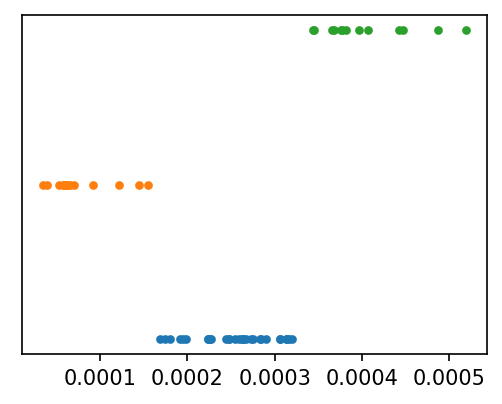

In [ ]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=3).fit([[value] for _, value in Site_dtw_Dist.items()])
Result = cluster_model.labels_
for i in np.unique(Result):
    print("Number of Cluster{} : {}".format(i,len(Result[Result==i])))
fig = plt.figure(figsize=(4, 3), dpi=150)
ax = fig.add_subplot(1,1,1)
Site_DTW_Numpy = np.array([value for _, value in Site_dtw_Dist.items()])
Site_Name_Numpy = np.array([key for key, _ in Site_dtw_Dist.items()])
Mean_Dis_For_Cluster = [None] * len(np.unique(Result))
for i in np.unique(Result):
    Mean_Dis_For_Cluster[i] = (np.mean(Site_DTW_Numpy[Result==i]))
    ax.scatter(Site_DTW_Numpy[Result==i],[i]*len(Site_DTW_Numpy[Result==i]), s=10)
    print("Number of Cluster{} : {}".format(i,Mean_Dis_For_Cluster[i]))
ax.get_yaxis().set_visible(False)
Best_Cluster = np.where(Mean_Dis_For_Cluster == np.amax(Mean_Dis_For_Cluster))[0]
Best_Site = Site_Name_Numpy[Result == Best_Cluster]
print(Best_Site)

## Classifiation

### Show flood data of the Site

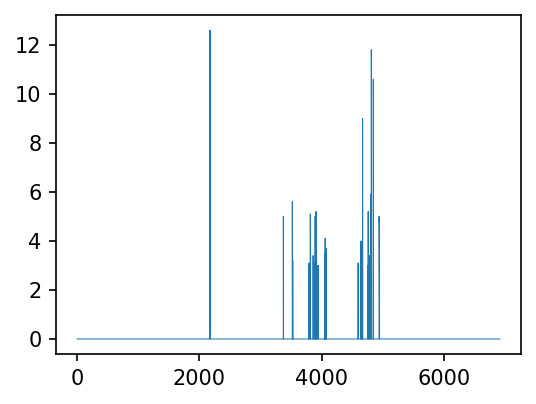

In [ ]:
tmp = Flood_Site_df['value'].to_numpy()
fig = plt.figure(figsize=(4, 3), dpi=150)
ax = fig.add_subplot(1,1,1)
ax.plot(range(len(tmp)),tmp, linewidth=0.5)

### Show 1 hour accumulated rainfall data of each sites

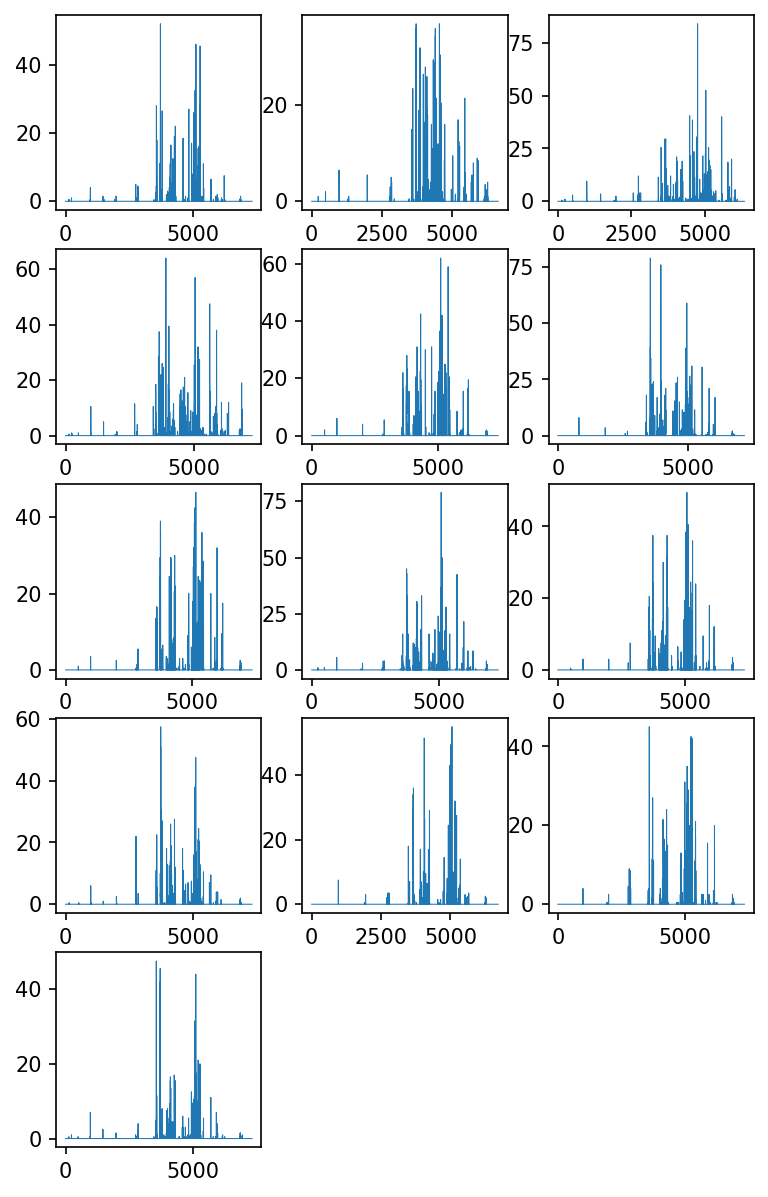

In [ ]:
fig = plt.figure(figsize=(6, 2*(len(Best_Site)//3+1)), dpi=150)
for i, Site in enumerate(Best_Site):
    tmp = Rain_df.loc[Rain_df['station_id']==Site]['RAIN']
    ax = fig.add_subplot(len(Best_Site)//3+1,3,i+1)
    ax.plot(range(len(tmp)),tmp, linewidth=0.5)

### Sample training dataset and testing dataset from rainfall dataframe

In [ ]:
Flooding = Flood_Site_df.loc[(Flood_Site_df['value'] > 0.0) & (Flood_Site_df['timestamp'] < "2021-08-01 00:00:00")][['timestamp', 'value']].values
Not_Flooding = Flood_Site_df.loc[(Flood_Site_df['value'] == 0.0) & (Flood_Site_df['timestamp'] < "2021-08-01 00:00:00")][['timestamp', 'value']]\
                .sample(n=10*len(Flooding)).values

Train_DataSet = {'x':[], 'y':[]}
for timestamp, _ in  tqdm(Flooding):
    tmp_x = []
    tmp_df = Rain_df.loc[(Rain_df['obsTime'] < (timestamp - timedelta(hours=1))) & (Rain_df['obsTime'] > (timestamp - timedelta(hours=60)))]
    for Site in Best_Site:
        Site_tmp_df = tmp_df.loc[(tmp_df['station_id']==Site)]
        if not Site_tmp_df.empty:
            tmp_x.append(Site_tmp_df.tail(24)[['RAIN', 'HOUR_3']].values.flatten())
    while len(tmp_x) < len(Best_Site):
        tmp_x.append(tmp_x[0])
    tmp_x = np.array(tmp_x).flatten()
    if len(tmp_x) == 24*len(Best_Site)*2:
        Train_DataSet['x'].append(tmp_x)
        Train_DataSet['y'].append(1)

for timestamp, _ in  tqdm(Not_Flooding):
    tmp_x = []
    tmp_df = Rain_df.loc[(Rain_df['obsTime'] < (timestamp - timedelta(hours=1))) & (Rain_df['obsTime'] > (timestamp - timedelta(hours=60)))]
    for Site in Best_Site:
        Site_tmp_df = tmp_df.loc[(tmp_df['station_id']==Site)]
        if not Site_tmp_df.empty:
            tmp_x.append(Site_tmp_df.tail(24)[['RAIN', 'HOUR_3']].values.flatten())
    tmp_x = np.array(tmp_x).flatten()
    if len(tmp_x) == 24*len(Best_Site)*2:
        Train_DataSet['x'].append(tmp_x)
        Train_DataSet['y'].append(0)


Flooding = Flood_Site_df.loc[(Flood_Site_df['value'] > 0.0) & (Flood_Site_df['timestamp'] > "2021-08-01 00:00:00")][['timestamp', 'value']].values
Not_Flooding = Flood_Site_df.loc[(Flood_Site_df['value'] == 0.0) & (Flood_Site_df['timestamp'] > "2021-08-01 00:00:00")][['timestamp', 'value']]\
                .sample(n=2*len(Flooding)).values

Test_DataSet = {'x':[], 'y':[]}
for timestamp, _ in  tqdm(Flooding):
    tmp_x = []
    tmp_df = Rain_df.loc[(Rain_df['obsTime'] < (timestamp - timedelta(hours=1))) & (Rain_df['obsTime'] > (timestamp - timedelta(hours=60)))]
    for Site in Best_Site:
        Site_tmp_df = tmp_df.loc[(tmp_df['station_id']==Site)]
        if not Site_tmp_df.empty:
            tmp_x.append(Site_tmp_df.tail(24)[['RAIN', 'HOUR_3']].values.flatten())
    while len(tmp_x) < len(Best_Site):
        tmp_x.append(tmp_x[0])
    tmp_x = np.array(tmp_x).flatten()
    if len(tmp_x) == 24*len(Best_Site)*2:
        Test_DataSet['x'].append(tmp_x)
        Test_DataSet['y'].append(1)

for timestamp, _ in  tqdm(Not_Flooding):
    tmp_x = []
    tmp_df = Rain_df.loc[(Rain_df['obsTime'] < (timestamp - timedelta(hours=1))) & (Rain_df['obsTime'] > (timestamp - timedelta(hours=60)))]
    for Site in Best_Site:
        Site_tmp_df = tmp_df.loc[(tmp_df['station_id']==Site)]
        if not Site_tmp_df.empty:
            tmp_x.append(Site_tmp_df.tail(24)[['RAIN', 'HOUR_3']].values.flatten())
    tmp_x = np.array(tmp_x).flatten()
    if len(tmp_x) == 24*len(Best_Site)*2:
        Test_DataSet['x'].append(tmp_x)
        Test_DataSet['y'].append(0)

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/340 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

### Show classification result

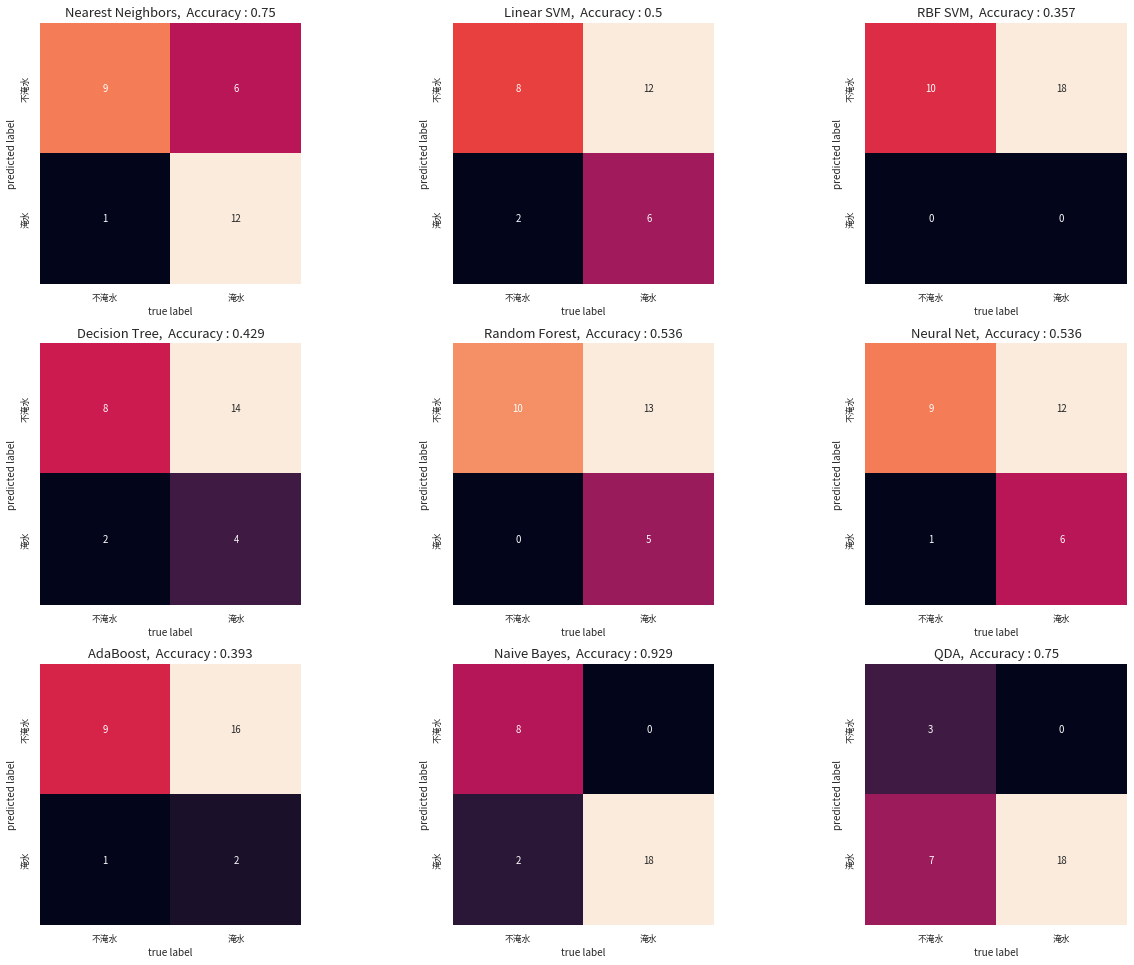

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

fig, axes = plt.subplots(3,3,figsize=(18, 13.5))
for i, model in enumerate(classifiers):
    model.fit(Train_DataSet['x'], Train_DataSet['y'])
    Result = model.predict(Test_DataSet['x'])
    # print("Accuracy for {} : {}".format(names[i], accuracy_score(Result, Test_DataSet['y'])))
    mat = confusion_matrix(Test_DataSet['y'], Result)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=["不淹水","淹水"], yticklabels=["不淹水","淹水"], ax = axes[i//3][i%3])
    axes[i//3][i%3].set_title("{},  Accuracy : {}".format(names[i], round(accuracy_score(Result, Test_DataSet['y']), 3)), fontweight="bold", size=13)
    axes[i//3][i%3].set_xlabel('true label', fontsize = 10.0)
    axes[i//3][i%3].set_ylabel('predicted label', fontsize = 10.0)
plt.tight_layout()

# Appendix(額外可供學習之資料)
如果你看完所有的內容後，對於機器學習想要更進一步的學習的話，這邊是一些你可以利用的資源。
(Pending)<br>

*   [台大資工 林軒田教授 Youtube頻道](https://www.youtube.com/c/hsuantien)





